In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("sales_2019.csv")

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19


In [4]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Zip Code
count,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,63877.518935
std,51512.737110,0.442793,332.731330,37776.308300
min,141234.000000,1.000000,2.990000,2215.000000
25%,185831.250000,1.000000,11.950000,10001.000000
50%,230367.500000,1.000000,14.950000,90001.000000
75%,275035.750000,1.000000,150.000000,94016.000000
max,319670.000000,9.000000,1700.000000,98101.000000


In [5]:
df = df.dropna()

In [6]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Zip Code
count,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,63877.518935
std,51512.737110,0.442793,332.731330,37776.308300
min,141234.000000,1.000000,2.990000,2215.000000
25%,185831.250000,1.000000,11.950000,10001.000000
50%,230367.500000,1.000000,14.950000,90001.000000
75%,275035.750000,1.000000,150.000000,94016.000000
max,319670.000000,9.000000,1700.000000,98101.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   State             185950 non-null  object 
 5   Zip Code          185950 non-null  int64  
 6   Date              185950 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 9.9+ MB


In [8]:
df = df.drop(["Order ID"], axis=1)

In [9]:
df.head()

,Product,Quantity Ordered,Price Each,State,Zip Code,Date
0,27in FHD Monitor,1,149.99,CA,94016,01/01/19
1,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19
2,Wired Headphones,1,11.99,WA,98101,01/01/19
3,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19
4,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19


In [10]:
parts = df["Date"].str.split("/", n = 3, expand = True)
df["month"]= parts[0].astype('int')
df["day"]= parts[1].astype('int')
df["year"]= ("20"+parts[2]).astype('int')

In [11]:
df.head()

,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year
0,27in FHD Monitor,1,149.99,CA,94016,01/01/19,1,1,2019
1,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19,1,1,2019
2,Wired Headphones,1,11.99,WA,98101,01/01/19,1,1,2019
3,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19,1,1,2019
4,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19,1,1,2019


In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [13]:
le = LabelEncoder()
df_with_id = df
df_with_id['Product'] = le.fit_transform(df_with_id['Product'])
df_with_id['State'] = le.fit_transform(df_with_id['State'])
df_with_id.head()

,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year
0,2,1,149.99,0,94016,01/01/19,1,1,2019
1,4,1,3.84,0,94016,01/01/19,1,1,2019
2,17,1,11.99,7,98101,01/01/19,1,1,2019
3,6,1,150.00,2,2215,01/01/19,1,1,2019
4,5,1,2.99,6,75001,01/01/19,1,1,2019


In [14]:
# df_with_id.drop(index=df_with_id.tail(26000).index, inplace=True)

C:\Users\bhowm\AppData\Local\Temp\ipykernel_22836\2838967803.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_with_id.corr()


<AxesSubplot: >

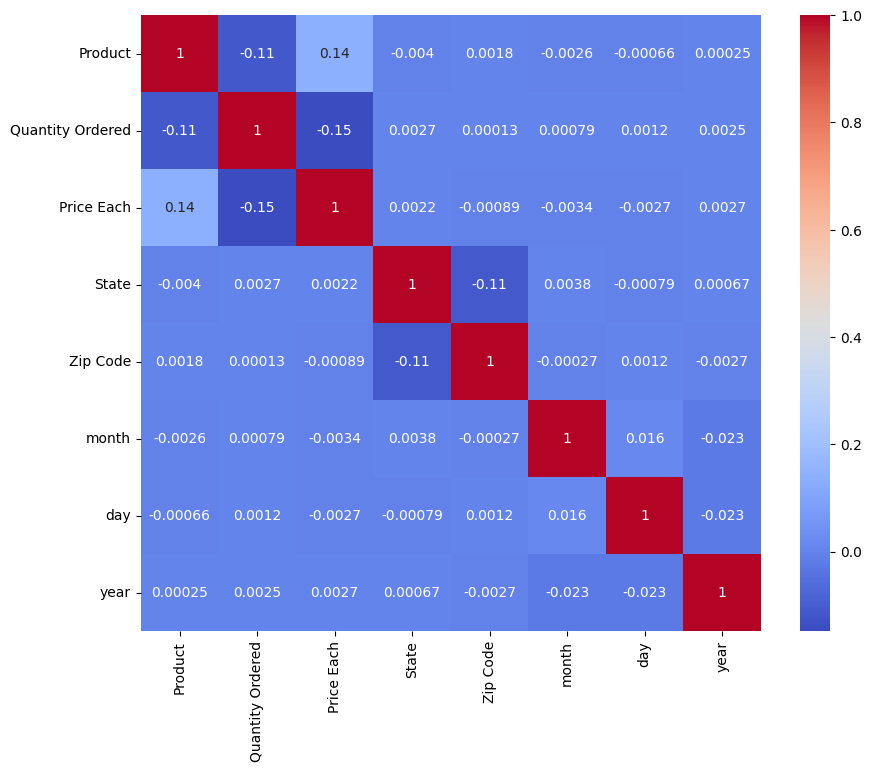

In [15]:
corr = df_with_id.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [16]:
product_1_data = df_with_id[df_with_id['Product'] == 4]

In [17]:
product_1_data.head()

,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year
1,4,1,3.84,0,94016,01/01/19,1,1,2019
19,4,1,3.84,7,98101,01/01/19,1,1,2019
20,4,1,3.84,0,94016,01/01/19,1,1,2019
26,4,1,3.84,4,10001,01/01/19,1,1,2019
28,4,1,3.84,1,30301,01/01/19,1,1,2019


In [18]:
product_1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20577 entries, 1 to 185941
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           20577 non-null  int32  
 1   Quantity Ordered  20577 non-null  int64  
 2   Price Each        20577 non-null  float64
 3   State             20577 non-null  int32  
 4   Zip Code          20577 non-null  int64  
 5   Date              20577 non-null  object 
 6   month             20577 non-null  int32  
 7   day               20577 non-null  int32  
 8   year              20577 non-null  int32  
dtypes: float64(1), int32(5), int64(2), object(1)
memory usage: 1.2+ MB


C:\Users\bhowm\AppData\Local\Temp\ipykernel_22836\458313495.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = product_1_data.corr()


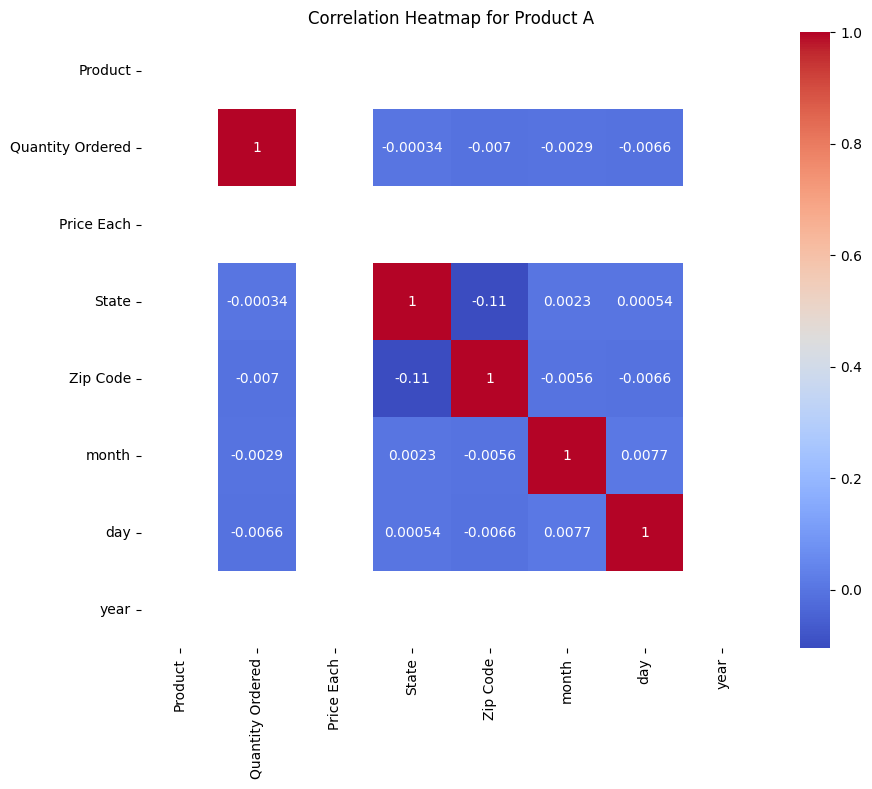

In [19]:
corr = product_1_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Product A')
plt.show()

C:\Users\bhowm\AppData\Local\Temp\ipykernel_22836\2177435554.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = group.corr()


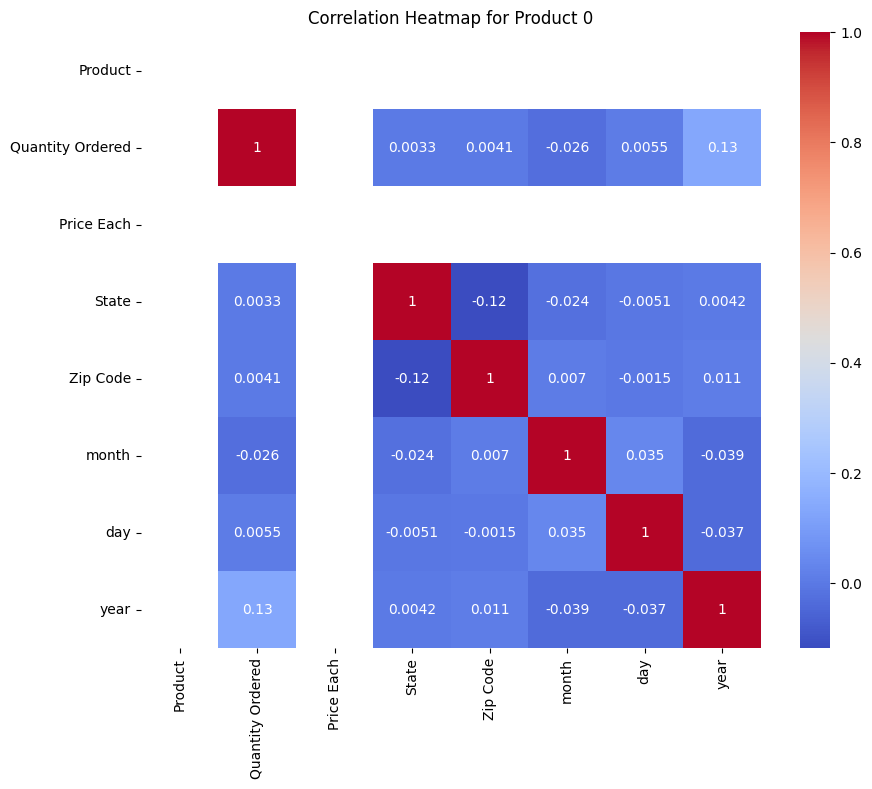

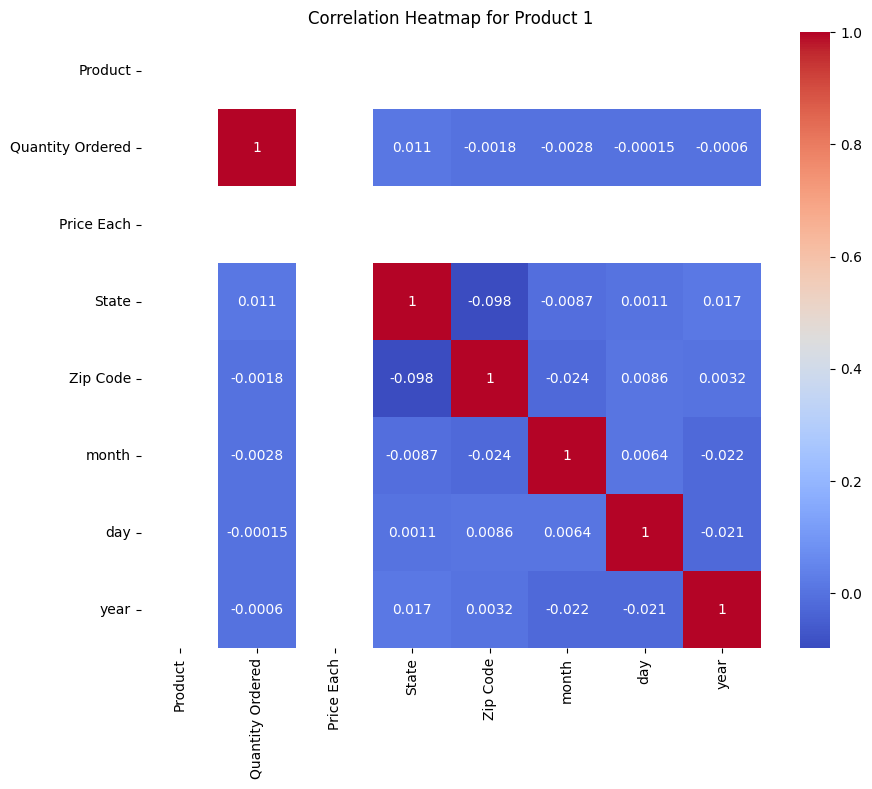

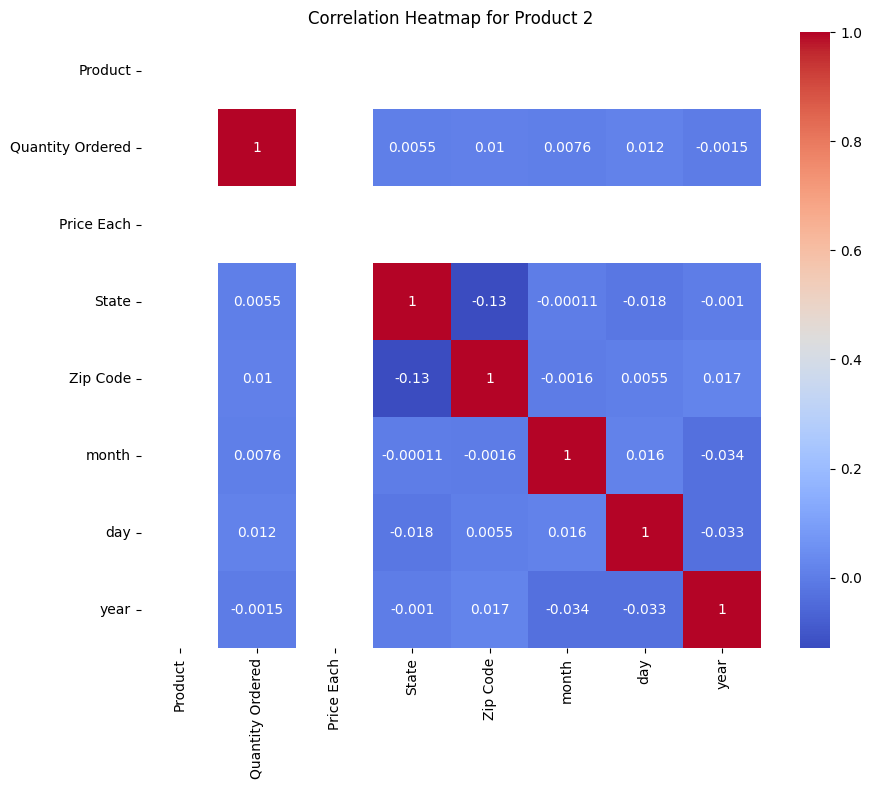

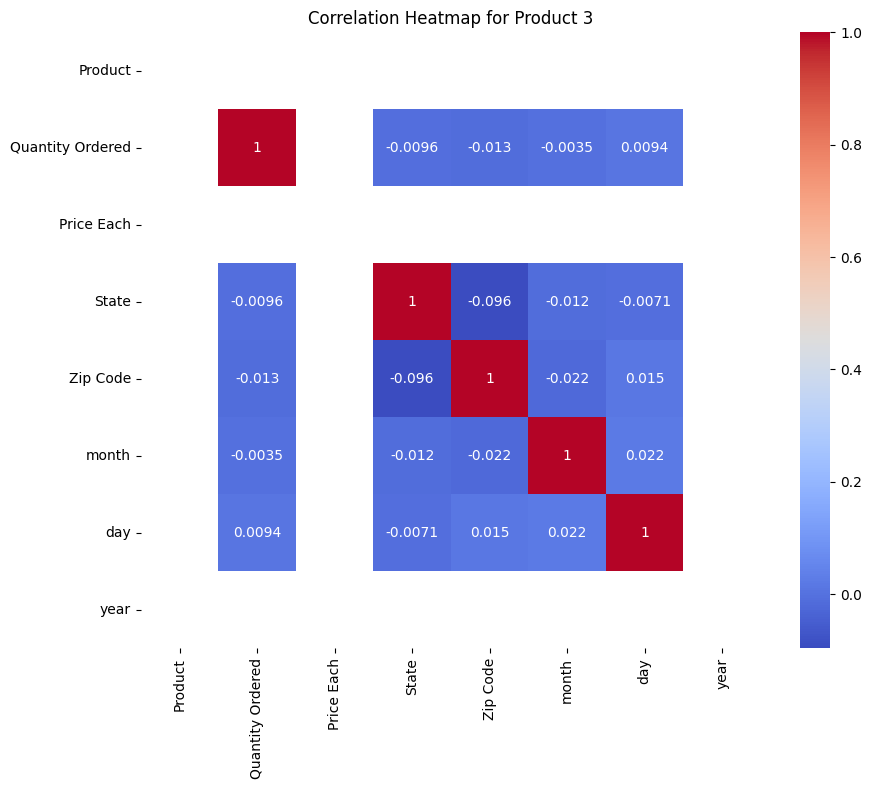

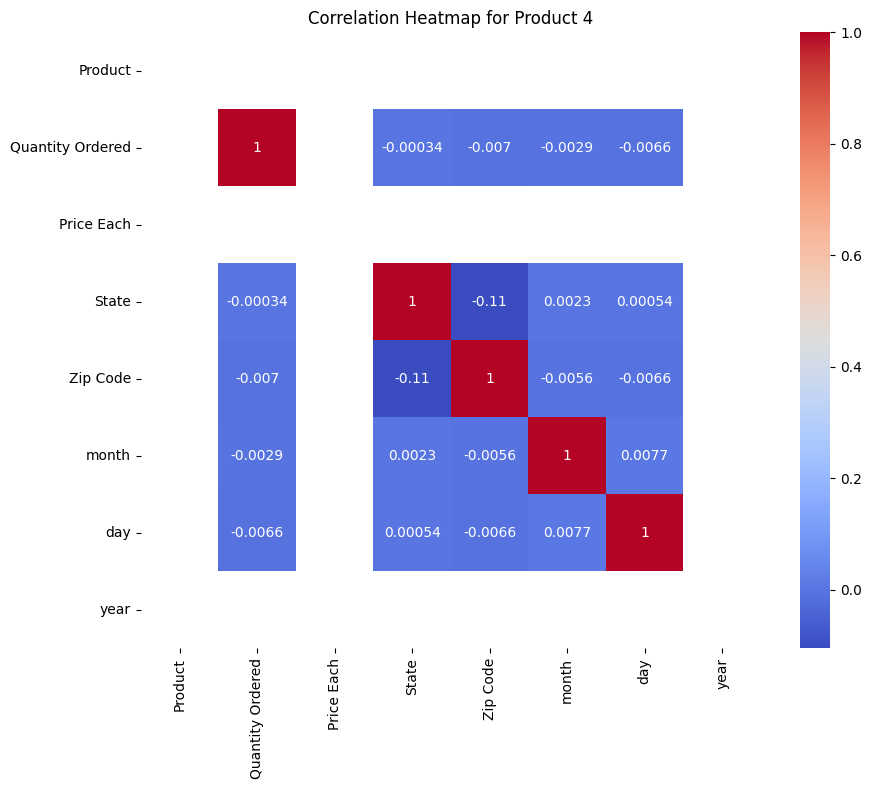

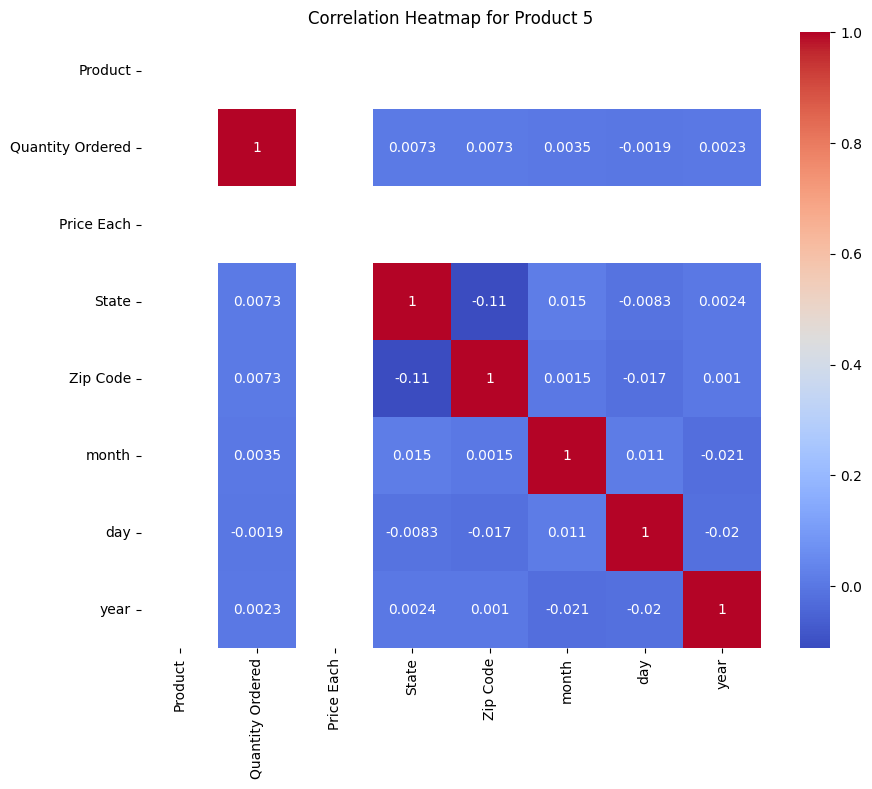

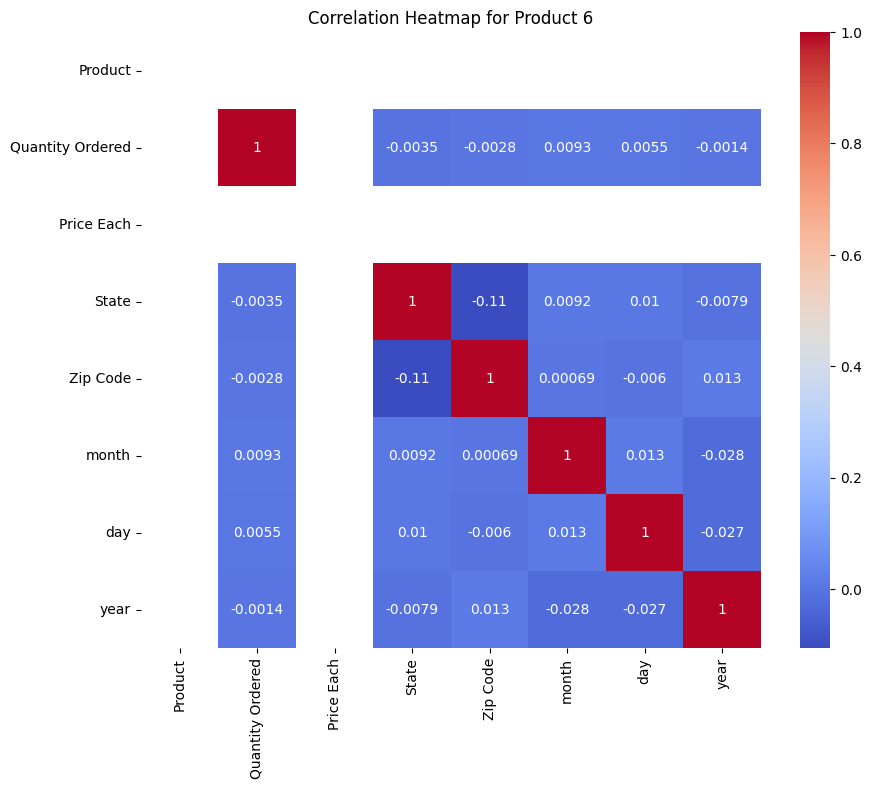

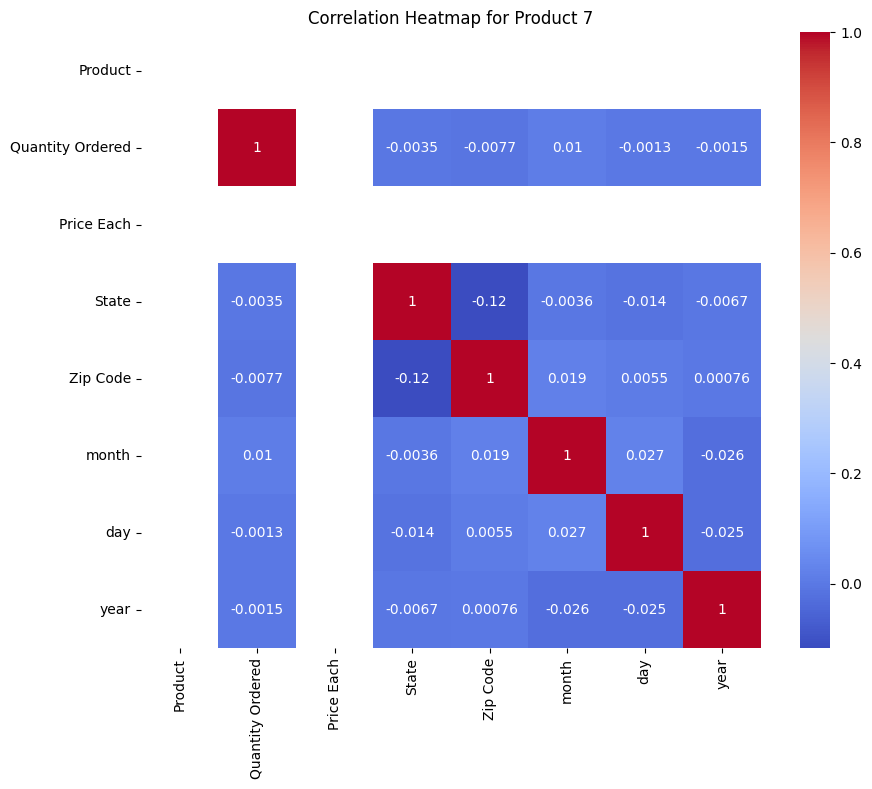

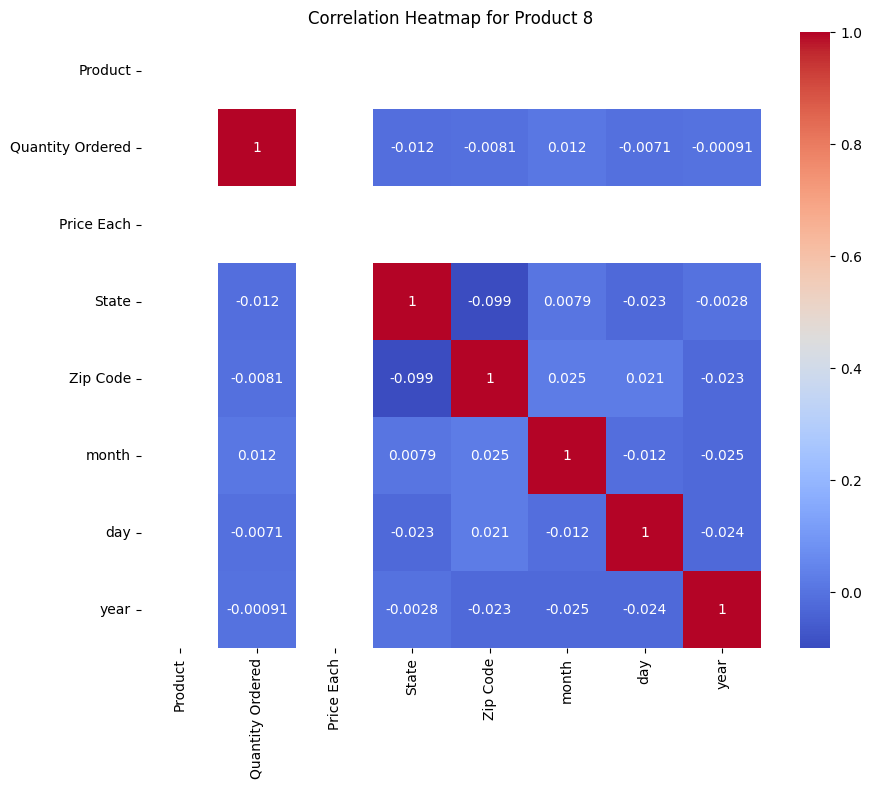

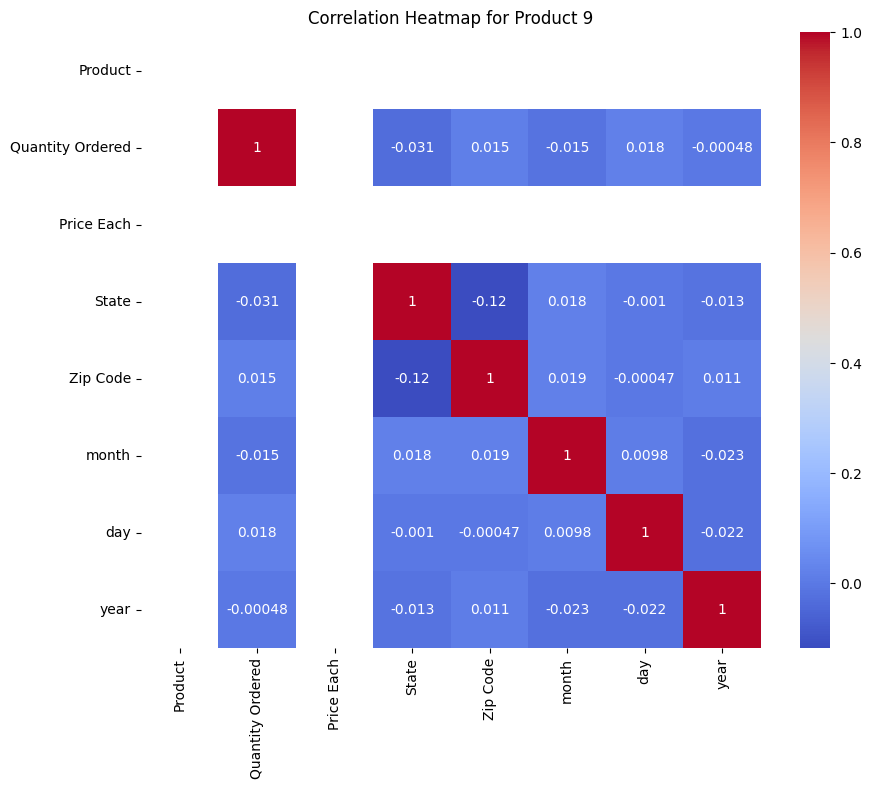

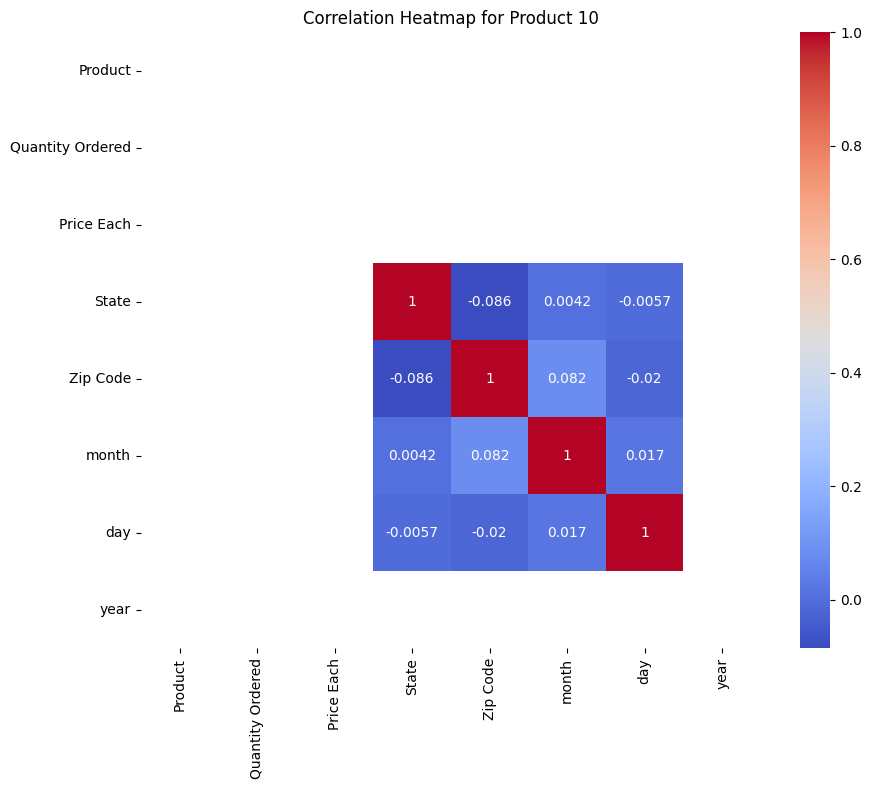

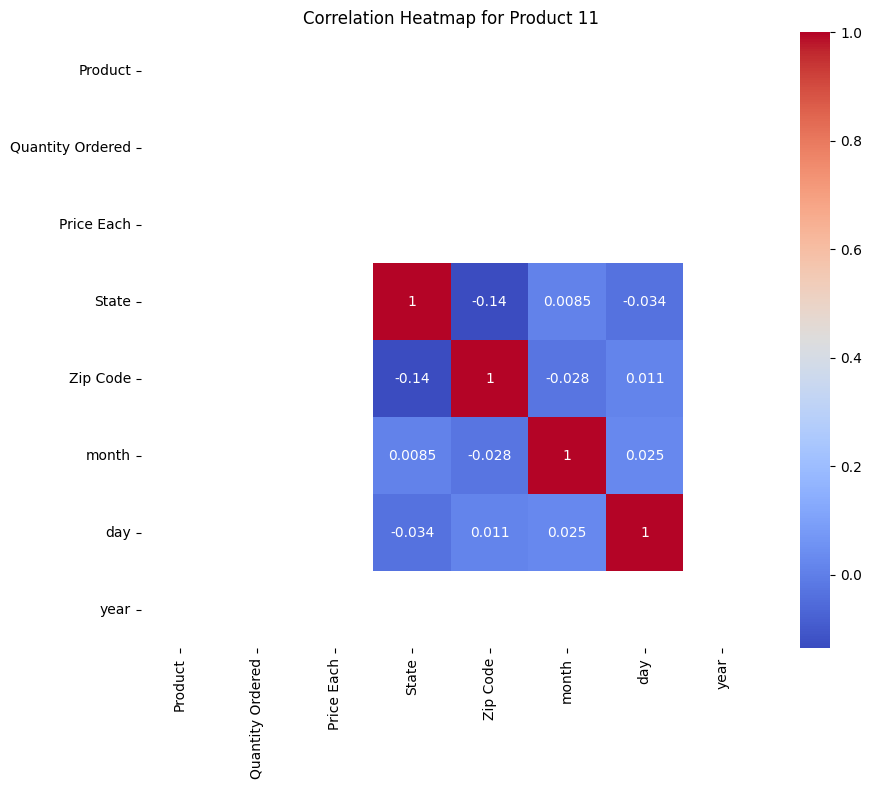

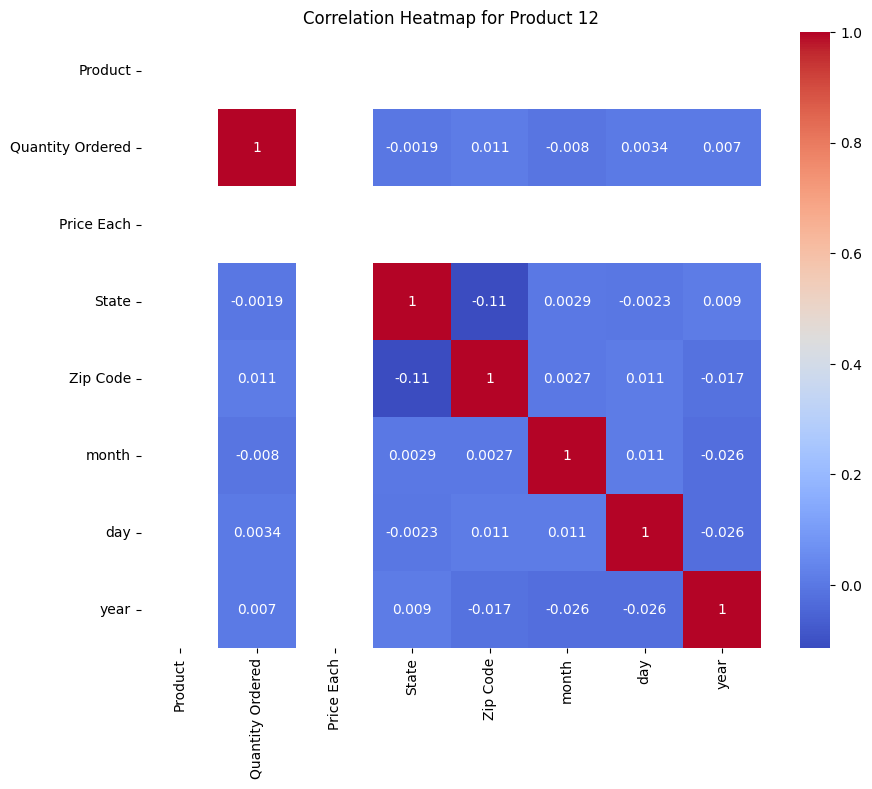

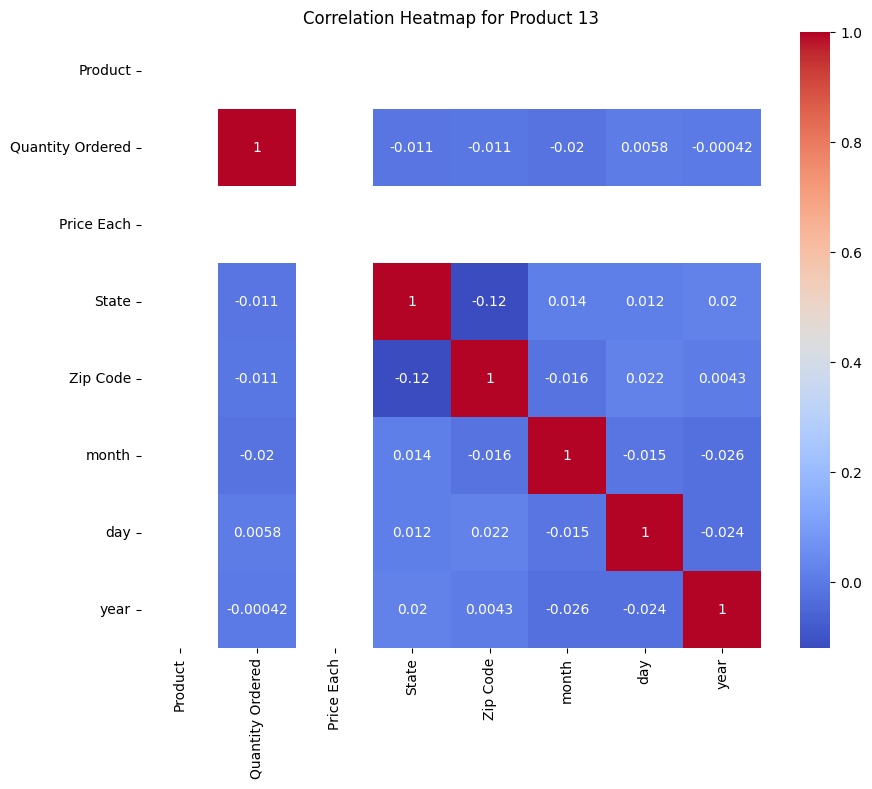

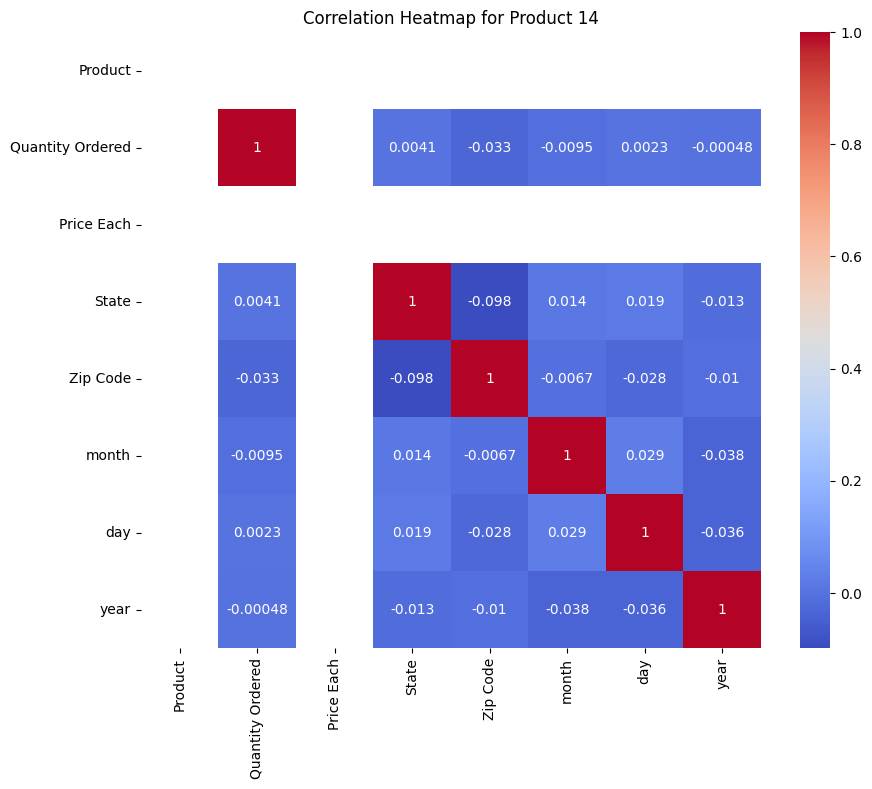

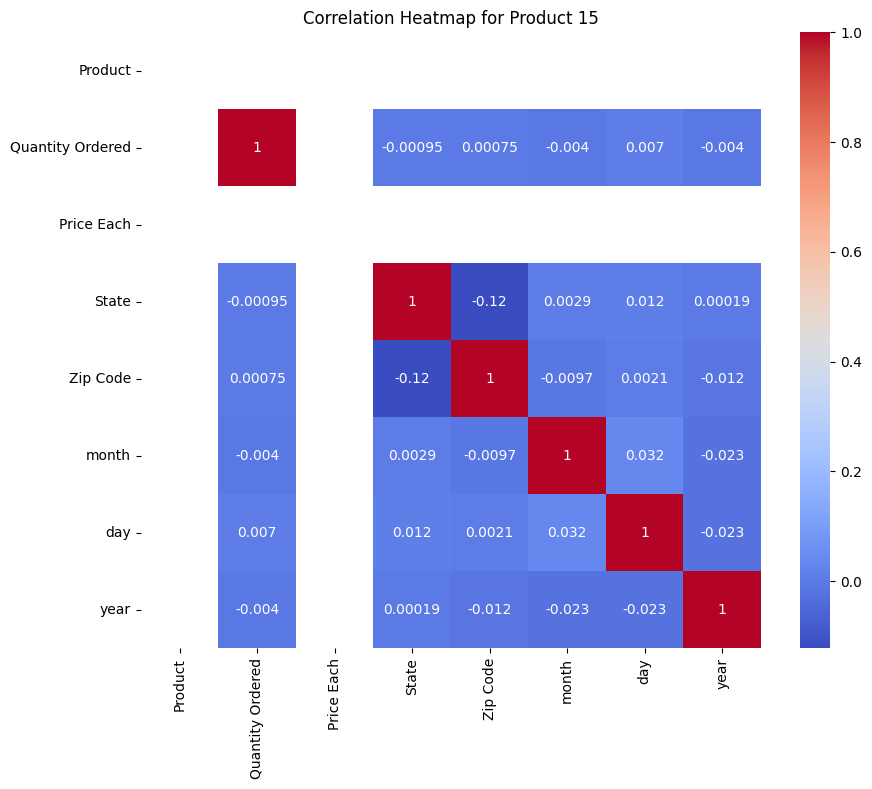

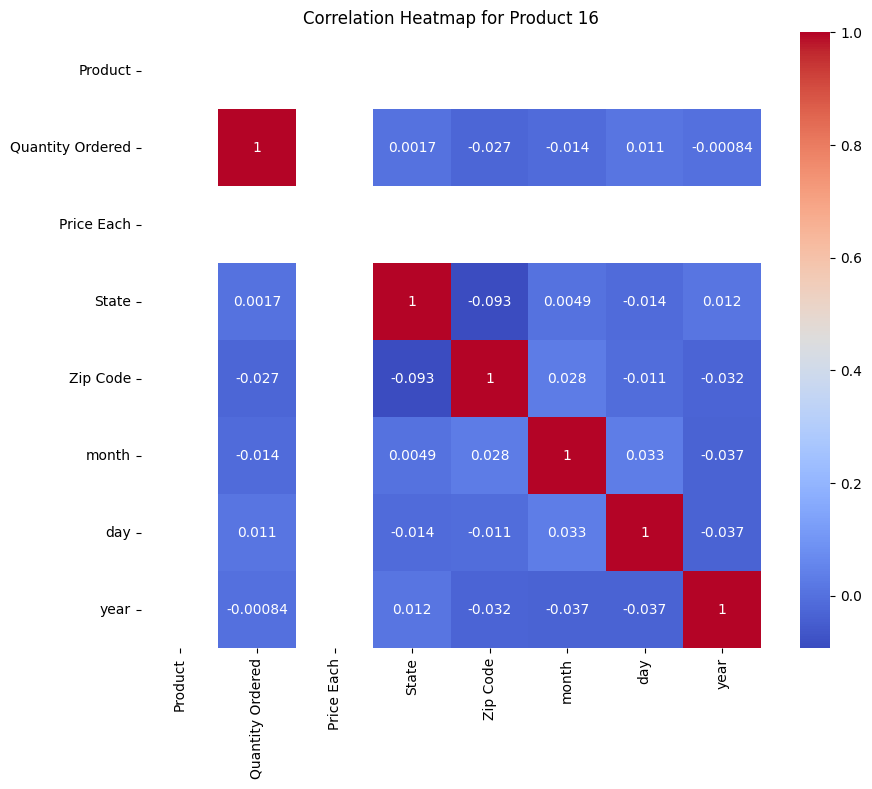

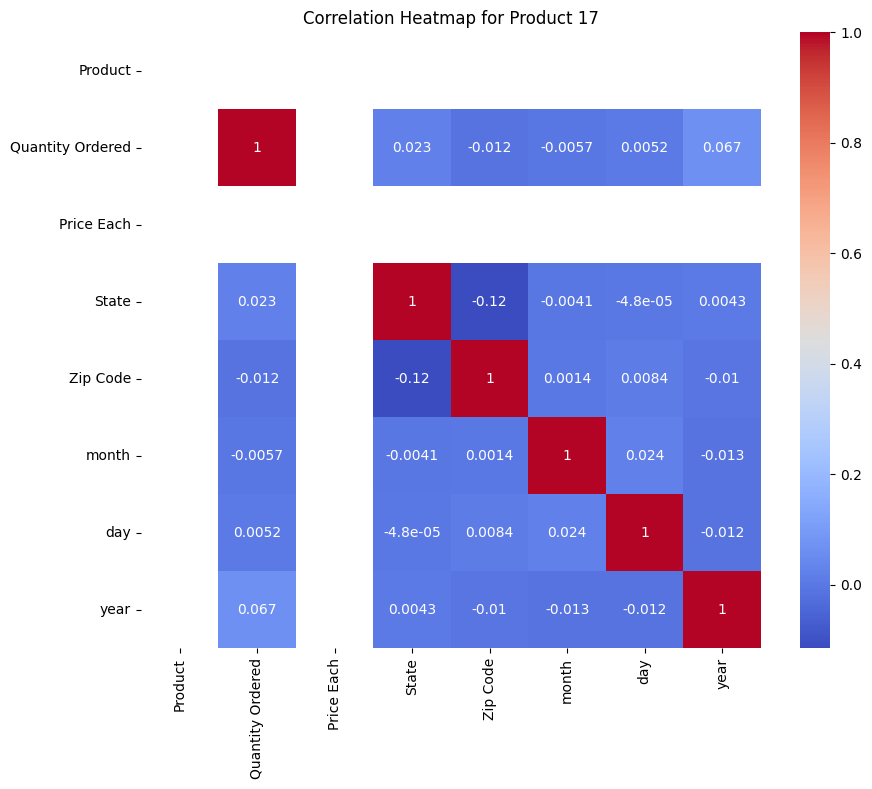

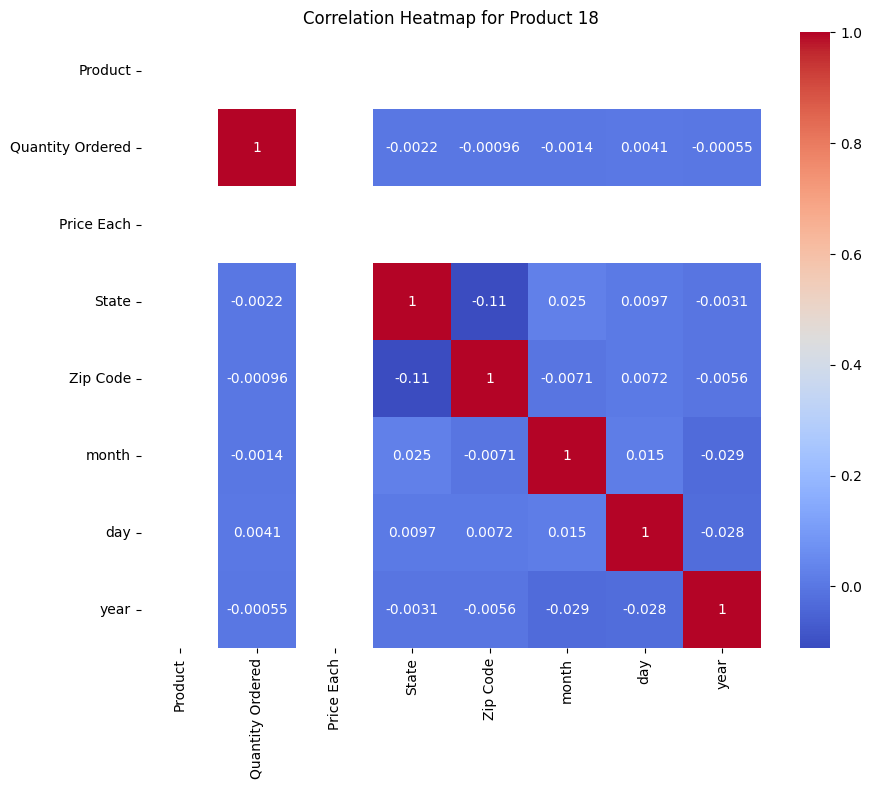

In [20]:
product_groups = df_with_id.groupby('Product')

for product, group in product_groups:
    corr = group.corr()
    
    plt.figure(figsize=(10, 8))
    
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    
    plt.title('Correlation Heatmap for Product {}'.format(product))
    
    plt.show()

In [21]:
product_10_data = df_with_id[df_with_id['Product'] == 4]
product_10_data.head()

,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year
1,4,1,3.84,0,94016,01/01/19,1,1,2019
19,4,1,3.84,7,98101,01/01/19,1,1,2019
20,4,1,3.84,0,94016,01/01/19,1,1,2019
26,4,1,3.84,4,10001,01/01/19,1,1,2019
28,4,1,3.84,1,30301,01/01/19,1,1,2019


C:\Users\bhowm\AppData\Local\Temp\ipykernel_22836\2878620344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = product_10_data.corr()


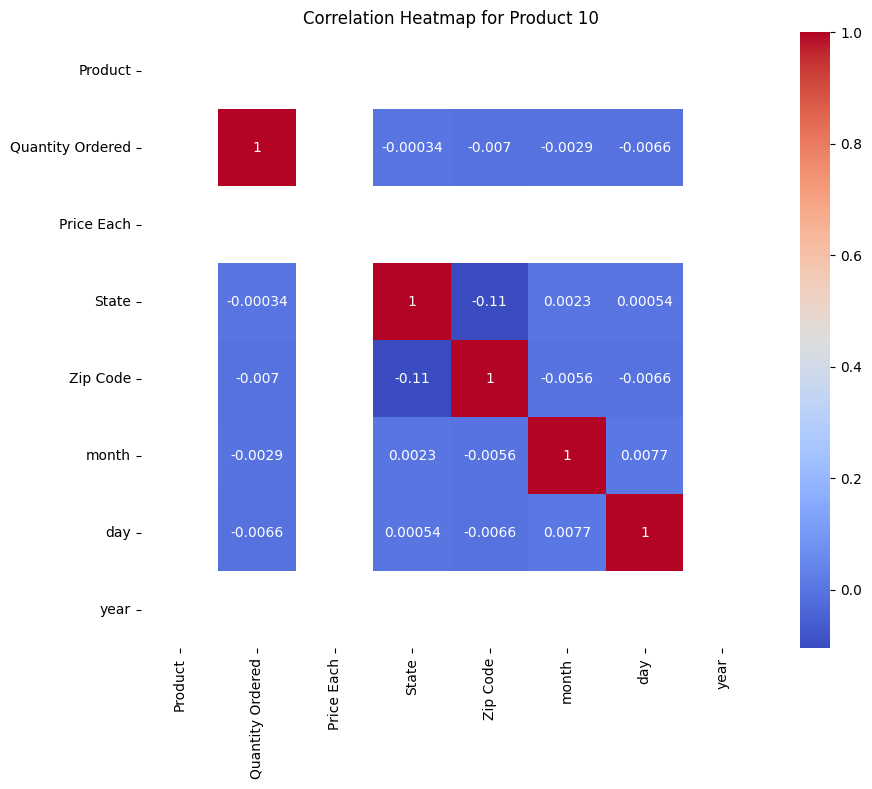

In [22]:
corr = product_10_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Product 10')
plt.show()

In [23]:
product_1_data.head()

,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year
1,4,1,3.84,0,94016,01/01/19,1,1,2019
19,4,1,3.84,7,98101,01/01/19,1,1,2019
20,4,1,3.84,0,94016,01/01/19,1,1,2019
26,4,1,3.84,4,10001,01/01/19,1,1,2019
28,4,1,3.84,1,30301,01/01/19,1,1,2019


In [24]:
product_1_data.tail()

,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year
185920,4,1,3.84,7,98101,12/31/19,12,31,2019
185922,4,1,3.84,1,30301,12/31/19,12,31,2019
185932,4,2,3.84,0,94016,12/31/19,12,31,2019
185936,4,1,3.84,3,4101,12/31/19,12,31,2019
185941,4,1,3.84,5,97035,12/31/19,12,31,2019


In [25]:
product_1_data = product_1_data.groupby('Date').sum('Quantity Ordered')
product_1_data.index = pd.to_datetime(product_1_data.index)
product_1_data = product_1_data.drop(['Product','Price Each', 'State', 'Zip Code', 'month', 'day', 'year'], axis=1)
product_1_data.head()

,Quantity Ordered
Date,
2019-01-01,33
2019-01-02,54
2019-01-03,44
2019-01-04,30
2019-01-05,50


In [26]:
quantile_98 = product_1_data['Quantity Ordered'].quantile(0.99)
producr_1_data_outliers = product_1_data[product_1_data['Quantity Ordered'] < quantile_98]

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(producr_1_data_outliers)

scaled_data

array([[0.02830189],
       [0.22641509],
       [0.13207547],
       [0.        ],
       [0.18867925],
       [0.08490566],
       [0.18867925],
       [0.10377358],
       [0.13207547],
       [0.14150943],
       [0.11320755],
       [0.12264151],
       [0.1509434 ],
       [0.09433962],
       [0.13207547],
       [0.1509434 ],
       [0.20754717],
       [0.21698113],
       [0.22641509],
       [0.22641509],
       [0.30188679],
       [0.08490566],
       [0.10377358],
       [0.24528302],
       [0.11320755],
       [0.33962264],
       [0.13207547],
       [0.14150943],
       [0.10377358],
       [0.20754717],
       [0.01886792],
       [0.23584906],
       [0.26415094],
       [0.29245283],
       [0.30188679],
       [0.37735849],
       [0.10377358],
       [0.30188679],
       [0.20754717],
       [0.27358491],
       [0.39622642],
       [0.40566038],
       [0.31132075],
       [0.4245283 ],
       [0.26415094],
       [0.23584906],
       [0.10377358],
       [0.301

In [28]:
product_1_data

,Quantity Ordered
Date,
2019-01-01,33
2019-01-02,54
2019-01-03,44
2019-01-04,30
2019-01-05,50
...,...
2019-12-27,105
2019-12-28,132
2019-12-29,122


In [29]:
data = producr_1_data_outliers.filter(['Quantity Ordered'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

343

In [30]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
9/9 [==============================] - 8s 64ms/step - loss: 0.0561
Epoch 2/20
9/9 [==============================] - 1s 61ms/step - loss: 0.0262
Epoch 3/20
9/9 [==============================] - 1s 62ms/step - loss: 0.0211
Epoch 4/20
9/9 [==============================] - 1s 58ms/step - loss: 0.0194
Epoch 5/20
9/9 [==============================] - 1s 67ms/step - loss: 0.0183
Epoch 6/20
9/9 [==============================] - 1s 68ms/step - loss: 0.0180
Epoch 7/20
9/9 [==============================] - 1s 59ms/step - loss: 0.0185
Epoch 8/20
9/9 [==============================] - 1s 56ms/step - loss: 0.0189
Epoch 9/20
9/9 [==============================] - 1s 57ms/step - loss: 0.0182
Epoch 10/20
9/9 [==============================] - 1s 58ms/step - loss: 0.0175
Epoch 11/20
9/9 [==============================] - 1s 56ms/step - loss: 0.0170
Epoch 12/20
9/9 [==============================] - 1s 59ms/step - loss: 0.0170
Epoch 13/20
9/9 [==============================] - 1s 66ms/st

In [35]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 0s 56ms/step


14.713863167970366

C:\Users\bhowm\AppData\Local\Temp\ipykernel_22836\3706403775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


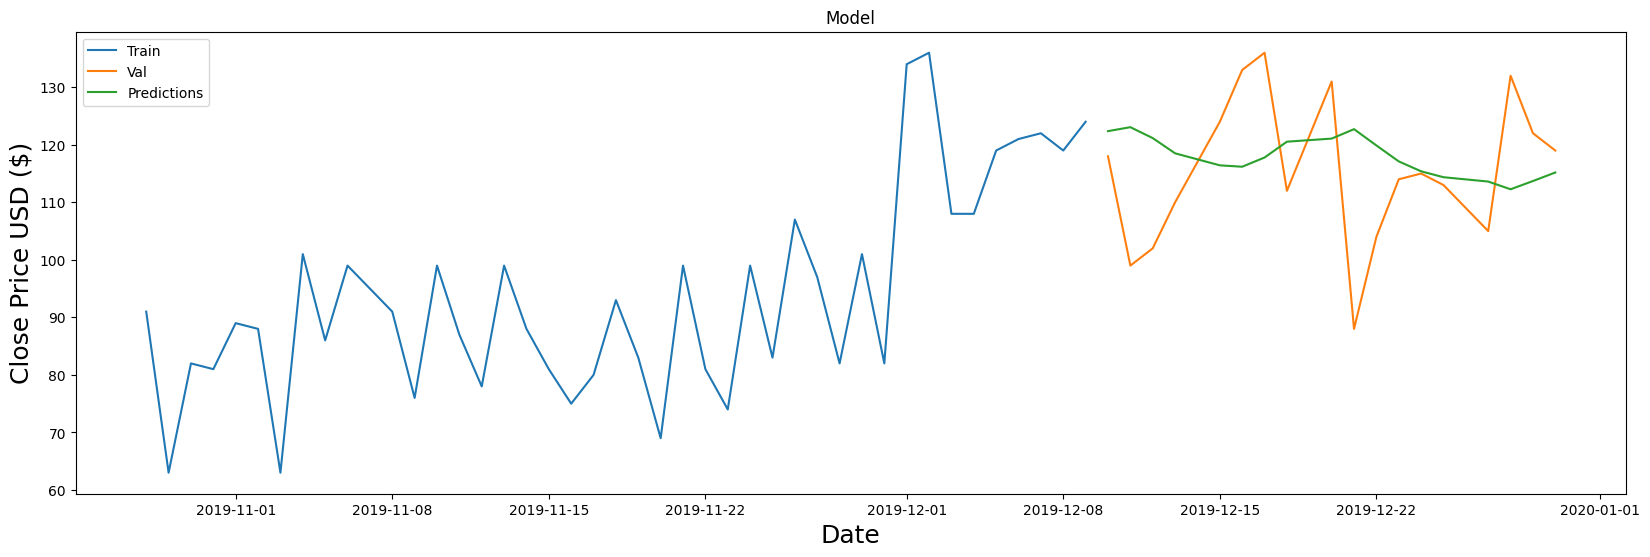

In [36]:
train = data.iloc[300:training_data_len, :]
valid = data.iloc[training_data_len:, :]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(20, 6))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Quantity Ordered'])
plt.plot(valid[['Quantity Ordered', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')

plt.show()

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
adam = Adam(lr=0.0005)
model.compile(loss='mean_squared_error', optimizer=adam)

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict on test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

Epoch 1/50


c:\Users\bhowm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 2s 37ms/step - loss: 0.2768 - val_loss: 0.0693
Epoch 2/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0543 - val_loss: 0.0428
Epoch 3/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0557 - val_loss: 0.0296
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0376 - val_loss: 0.0519
Epoch 5/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0361 - val_loss: 0.0437
Epoch 6/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0328 - val_loss: 0.0363
Epoch 7/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0326 - val_loss: 0.0297
Epoch 8/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0334 - val_loss: 0.0318
Epoch 9/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0263 - val_loss: 0.0349
Epoch 10/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0276 - val_loss: 0.0340
Epoch 11/50
8/8 [=======================

20.765353018550204

C:\Users\bhowm\AppData\Local\Temp\ipykernel_22836\3706403775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


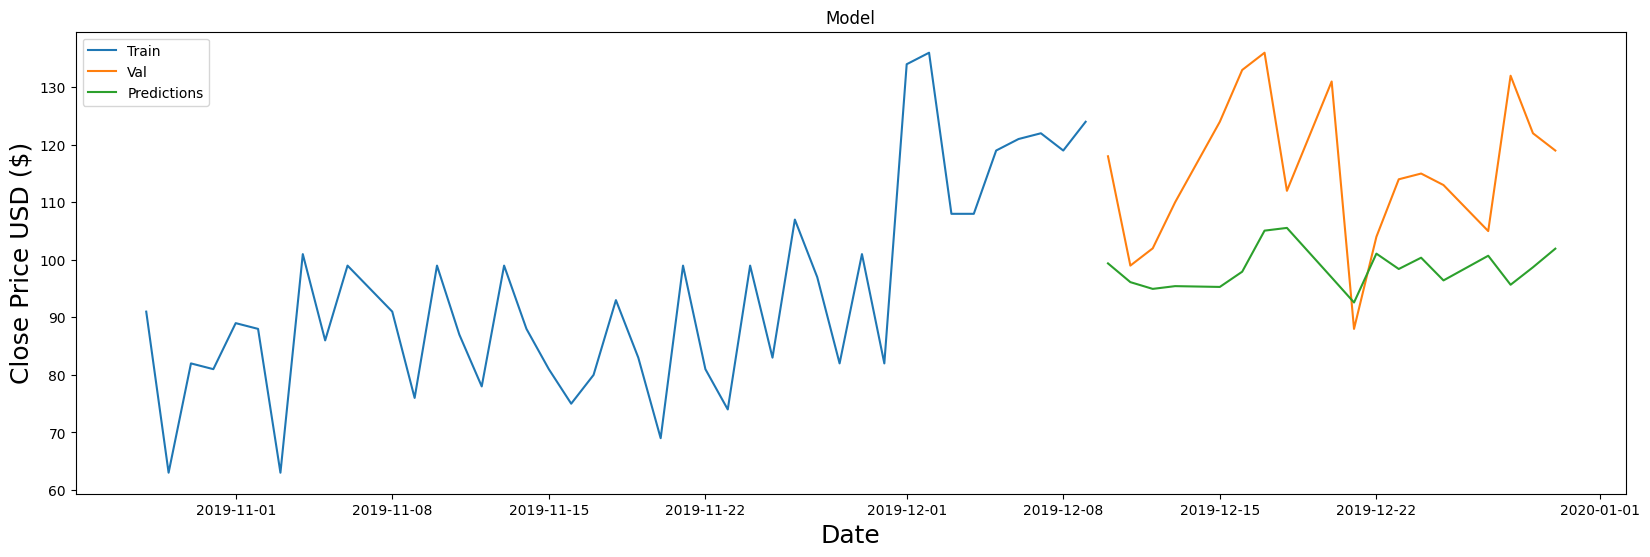

In [54]:
train = data.iloc[300:training_data_len, :]
valid = data.iloc[training_data_len:, :]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(20, 6))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Quantity Ordered'])
plt.plot(valid[['Quantity Ordered', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')

plt.show()

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
rmsprop = RMSprop(lr=0.0005)
model.compile(loss='mean_squared_error', optimizer=rmsprop)

# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop, lr_scheduler])

# Predict on test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:", rmse)

Epoch 1/100


c:\Users\bhowm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 2s 34ms/step - loss: 0.0509 - val_loss: 0.0533 - lr: 5.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0407 - val_loss: 0.0536 - lr: 5.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0340 - val_loss: 0.0643 - lr: 5.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0347 - val_loss: 0.0985 - lr: 5.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0334 - val_loss: 0.0414 - lr: 5.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0286 - val_loss: 0.0335 - lr: 5.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0291 - val_loss: 0.0719 - lr: 5.0000e-04
Epoch 8/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0330 - val_loss: 0.0730 - lr: 5.0000e-04
Epoch 9/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0292 - val_loss: 0.

C:\Users\bhowm\AppData\Local\Temp\ipykernel_22836\89096697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


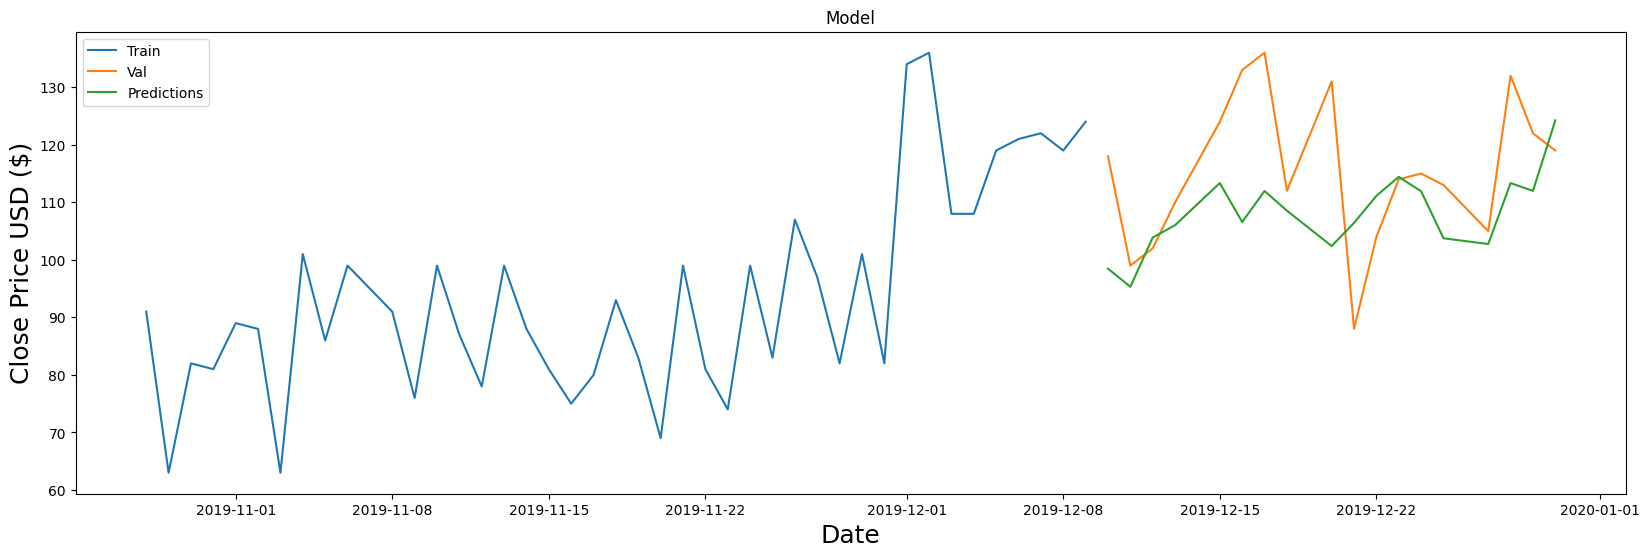

In [52]:
train = data.iloc[300:training_data_len, :]
valid = data.iloc[training_data_len:, :]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(20, 6))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Quantity Ordered'])
plt.plot(valid[['Quantity Ordered', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
adam = Adam(lr=0.0005)
model.compile(loss='mean_squared_error', optimizer=adam)

# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop, lr_scheduler])

# Predict on test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:", rmse)

Epoch 1/100


c:\Users\bhowm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 3s 42ms/step - loss: 0.4712 - val_loss: 0.4710 - lr: 5.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.2513 - val_loss: 0.2630 - lr: 5.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 21ms/step - loss: 0.1423 - val_loss: 0.1123 - lr: 5.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0731 - val_loss: 0.0403 - lr: 5.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0663 - val_loss: 0.0285 - lr: 5.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0524 - val_loss: 0.0311 - lr: 5.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0475 - val_loss: 0.0511 - lr: 5.0000e-04
Epoch 8/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0500 - val_loss: 0.0623 - lr: 5.0000e-04
Epoch 9/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0392 - val_loss: 0.

C:\Users\bhowm\AppData\Local\Temp\ipykernel_22836\89096697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


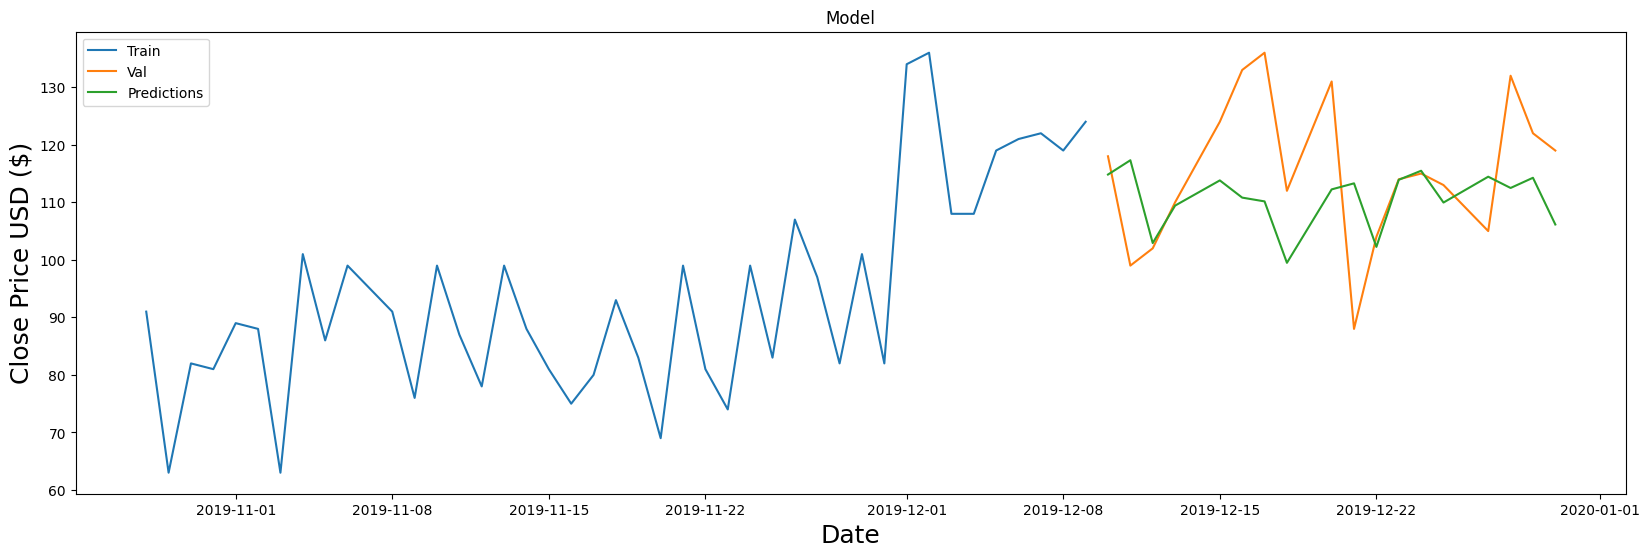

In [57]:
train = data.iloc[300:training_data_len, :]
valid = data.iloc[training_data_len:, :]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(20, 6))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Quantity Ordered'])
plt.plot(valid[['Quantity Ordered', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
adam = Adam(lr=0.0005)
model.compile(loss='mean_squared_error', optimizer=adam)

# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop, lr_scheduler])

# Predict on test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:", rmse)

Epoch 1/100


c:\Users\bhowm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 2s 44ms/step - loss: 0.1752 - val_loss: 0.1430 - lr: 5.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0502 - val_loss: 0.0382 - lr: 5.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0451 - val_loss: 0.0419 - lr: 5.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0344 - val_loss: 0.0615 - lr: 5.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 19ms/step - loss: 0.0346 - val_loss: 0.0671 - lr: 5.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 20ms/step - loss: 0.0324 - val_loss: 0.0503 - lr: 5.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 20ms/step - loss: 0.0296 - val_loss: 0.0432 - lr: 5.0000e-04
Epoch 8/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0266 - val_loss: 0.0441 - lr: 2.5000e-04
Epoch 9/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0313 - val_loss: 0

In [64]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers

# Define the model
model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
adam = Adam(lr=0.0005)
model.compile(loss='mean_squared_error', optimizer=adam)

# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop, lr_scheduler])

# Predict on test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:", rmse)

Epoch 1/100


c:\Users\bhowm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 3s 143ms/step - loss: 0.4772 - val_loss: 0.4154 - lr: 5.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4289 - val_loss: 0.4480 - lr: 5.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 14ms/step - loss: 0.4087 - val_loss: 0.4438 - lr: 5.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3905 - val_loss: 0.3867 - lr: 5.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3751 - val_loss: 0.3813 - lr: 5.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3620 - val_loss: 0.3770 - lr: 5.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3482 - val_loss: 0.3510 - lr: 5.0000e-04
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3361 - val_loss: 0.3546 - lr: 5.0000e-04
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.3277 - val_loss: 0.3334 

C:\Users\bhowm\AppData\Local\Temp\ipykernel_22836\89096697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


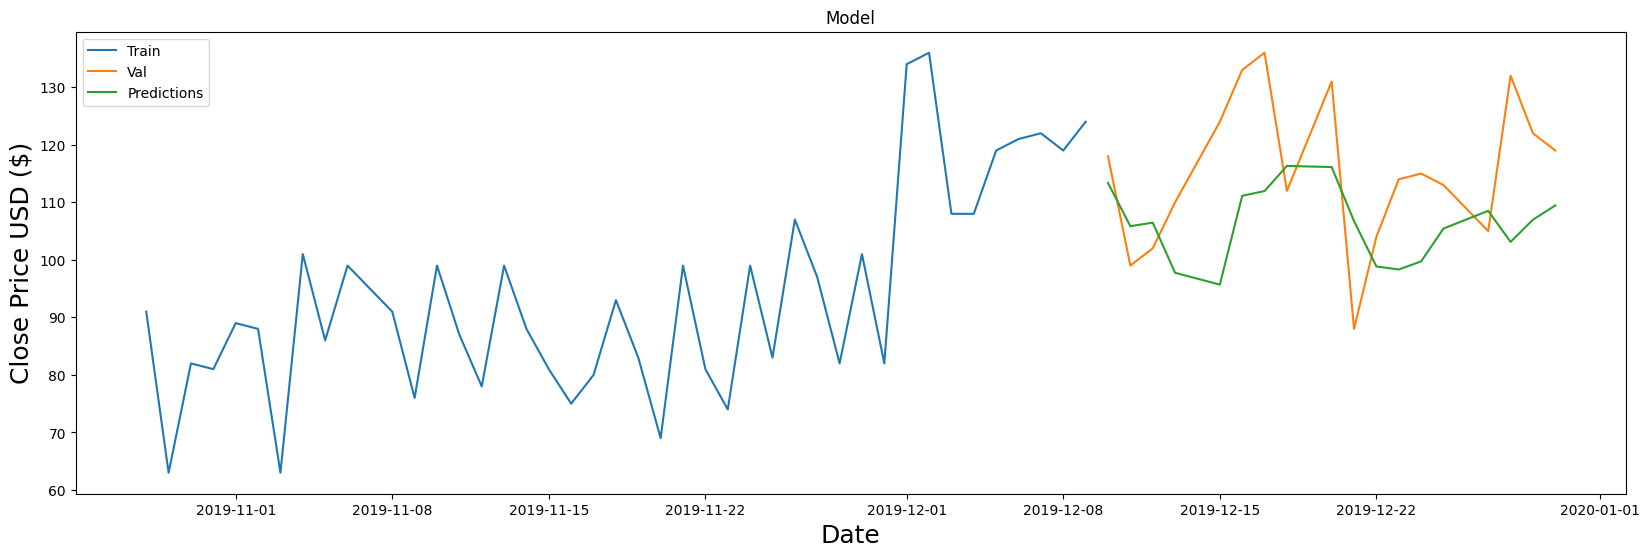

In [65]:
train = data.iloc[300:training_data_len, :]
valid = data.iloc[training_data_len:, :]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(20, 6))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Quantity Ordered'])
plt.plot(valid[['Quantity Ordered', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
model = Sequential()
model.add(LSTM(64, input_shape=(x_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compile the model
adam = Adam(lr=0.0005)
model.compile(loss='mean_squared_error', optimizer=adam)

# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop, lr_scheduler])

# Predict on test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:", rmse)

Epoch 1/100


c:\Users\bhowm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 7s 245ms/step - loss: 0.1287 - val_loss: 0.1412 - lr: 5.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 53ms/step - loss: 0.0361 - val_loss: 0.0261 - lr: 5.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 52ms/step - loss: 0.0297 - val_loss: 0.0327 - lr: 5.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 52ms/step - loss: 0.0257 - val_loss: 0.0489 - lr: 5.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 54ms/step - loss: 0.0230 - val_loss: 0.0257 - lr: 5.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 52ms/step - loss: 0.0235 - val_loss: 0.0269 - lr: 5.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 54ms/step - loss: 0.0216 - val_loss: 0.0303 - lr: 5.0000e-04
Epoch 8/100
8/8 [==============================] - 0s 53ms/step - loss: 0.0210 - val_loss: 0.0297 - lr: 5.0000e-04
Epoch 9/100
8/8 [==============================] - 0s 40ms/step - loss: 0.0212 - val_loss: 

C:\Users\bhowm\AppData\Local\Temp\ipykernel_22836\89096697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


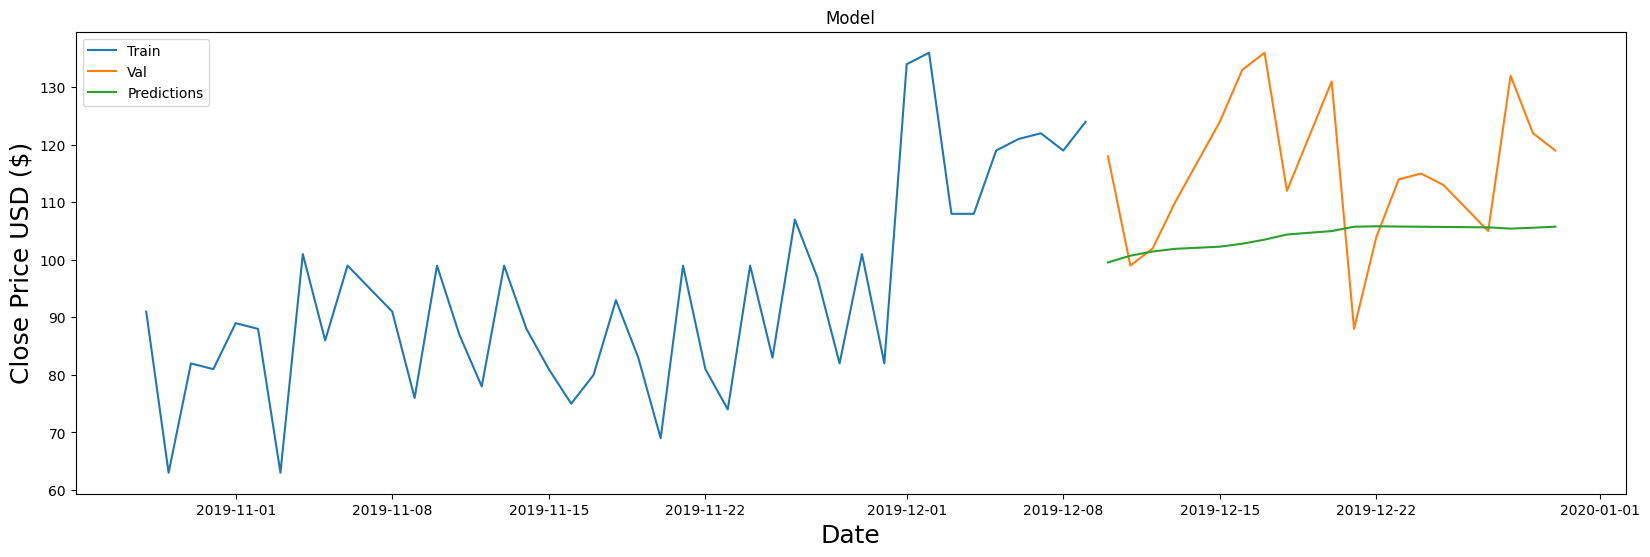

In [74]:
train = data.iloc[300:training_data_len, :]
valid = data.iloc[training_data_len:, :]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(20, 6))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Quantity Ordered'])
plt.plot(valid[['Quantity Ordered', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=64)

# Make predictions on test data
y_pred = model.predict(x_test)

# Reshape predictions and test labels to calculate RMSE
y_pred = y_pred.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))

print("Root Mean Squared Error: ", rmse)

Epoch 1/100
5/5 [==============================] - 13s 101ms/step - loss: 0.1597
Epoch 2/100
5/5 [==============================] - 1s 123ms/step - loss: 0.0419
Epoch 3/100
5/5 [==============================] - 1s 119ms/step - loss: 0.0269
Epoch 4/100
5/5 [==============================] - 1s 112ms/step - loss: 0.0292
Epoch 5/100
5/5 [==============================] - 0s 87ms/step - loss: 0.0239
Epoch 6/100
5/5 [==============================] - 1s 105ms/step - loss: 0.0233
Epoch 7/100
5/5 [==============================] - 0s 85ms/step - loss: 0.0237
Epoch 8/100
5/5 [==============================] - 0s 76ms/step - loss: 0.0232
Epoch 9/100
5/5 [==============================] - 1s 108ms/step - loss: 0.0215
Epoch 10/100
5/5 [==============================] - 1s 186ms/step - loss: 0.0217
Epoch 11/100
5/5 [==============================] - 1s 101ms/step - loss: 0.0206
Epoch 12/100
5/5 [==============================] - 1s 97ms/step - loss: 0.0206
Epoch 13/100
5/5 [======================

C:\Users\bhowm\AppData\Local\Temp\ipykernel_22836\89096697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


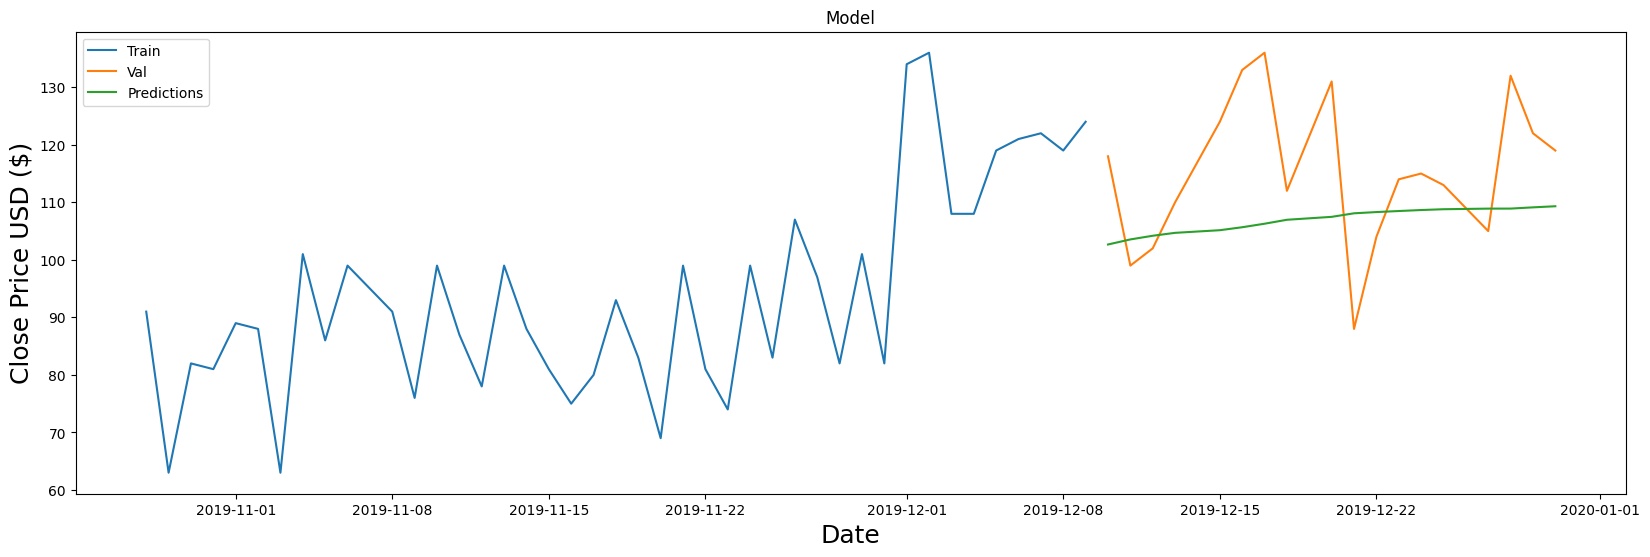

In [67]:
train = data.iloc[300:training_data_len, :]
valid = data.iloc[training_data_len:, :]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(20, 6))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Quantity Ordered'])
plt.plot(valid[['Quantity Ordered', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')

In [68]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
adam = Adam(lr=0.0005)
model.compile(loss='mean_squared_error', optimizer=adam)

# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop, lr_scheduler])

# Predict on test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:", rmse)

Epoch 1/100


c:\Users\bhowm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 2s 49ms/step - loss: 4.1475 - val_loss: 0.4026 - lr: 5.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 3.5627 - val_loss: 0.4218 - lr: 5.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 3.2460 - val_loss: 0.4407 - lr: 5.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 18ms/step - loss: 3.0388 - val_loss: 0.4475 - lr: 5.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 2.4555 - val_loss: 0.4540 - lr: 5.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 2.3859 - val_loss: 0.4515 - lr: 5.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 15ms/step - loss: 2.2329 - val_loss: 0.4572 - lr: 2.5000e-04
Epoch 8/100
8/8 [==============================] - 0s 11ms/step - loss: 2.0888 - val_loss: 0.4685 - lr: 2.5000e-04
Epoch 9/100
8/8 [==============================] - 0s 12ms/step - loss: 1.9326 - val_loss: 0

In [ ]:
product_1_data

In [ ]:
product_1_data.info()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

col_name = 'Quantity Ordered'
producr_1_data_outliers[['Quantity Ordered']] = scaler.fit_transform(producr_1_data_outliers[['Quantity Ordered']])

In [ ]:
product_1_data.info()

In [ ]:
product_1_data = producr_1_data_outliers

In [ ]:
product_1_data.plot(
        # style='.',
        figsize=(15, 5),
        title='Sales over the period')
plt.show()

In [ ]:
# quantile_98 = product_1_data['Quantity Ordered'].quantile(0.96)
# producr_1_data_outliers = product_1_data[df_temp['Quantity Ordered'] < quantile_98]

In [ ]:
train = product_1_data.loc[product_1_data.index < '2019-12-10']
test = product_1_data.loc[product_1_data.index >= '2019-12-10']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Train/Test Split data')
test.plot(ax=ax, label='Test Set')
ax.axvline('2019-12-10', color='Gray', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
product_1_data.loc[(product_1_data.index > '2019-01-01') & (product_1_data.index < '2019-01-30')] \
    .plot(figsize=(15, 5), title='Month sales')
plt.show()

In [ ]:
def create_features(product_1_data):
    """
    Creating time series features based on dataframe index.
    """
    product_1_data = product_1_data.copy()
    # df['hour'] = df.index.hour
    product_1_data['dayofweek'] = product_1_data.index.dayofweek
    product_1_data['quarter'] = product_1_data.index.quarter
    product_1_data['month'] = product_1_data.index.month
    product_1_data['year'] = product_1_data.index.year
    product_1_data['dayofyear'] = product_1_data.index.dayofyear
    product_1_data['dayofmonth'] = product_1_data.index.day
    product_1_data['weekofyear'] = product_1_data.index.isocalendar().week
    return product_1_data

product_1_data = create_features(product_1_data)

In [ ]:
week_day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
}
df_temp = product_1_data.copy()
df_temp['dayofweek'] = df_temp['dayofweek'].map(lambda index: week_day_map[index])

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_temp, x='dayofweek', y='Quantity Ordered')
ax.set_title('Sales on Week')
plt.show()

In [ ]:
product_1_data

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=product_1_data, x='dayofweek', y='Quantity Ordered')
ax.set_title('Sales on Week')
plt.show()

In [ ]:
month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
}
df_temp = product_1_data.copy()
df_temp['month'] = df_temp['month'].map(lambda index: month_map[index])

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_temp, x='month', y='Quantity Ordered', palette='Blues')
ax.set_title('Sales on Month')
plt.show()

In [ ]:
month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
}
df_temp_2 = product_1_data.copy()
df_temp_2['month'] = df_temp_2['month'].map(lambda index: month_map[index])

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_temp_2, x='month', y='Quantity Ordered', palette='Blues')
ax.set_title('Sales on Month')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_temp, x='quarter', y='Quantity Ordered', palette='Greens')
ax.set_title('Sales on Quarter')
plt.show()

In [ ]:
train = create_features(train)
test = create_features(test)

# FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year', 'dayofmonth']
FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofmonth']
TARGET = 'Quantity Ordered'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import Lasso, Ridge

In [ ]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

In [ ]:
product_1_data_lr = product_1_data

In [ ]:
test['prediction_lr'] = linreg_model.predict(X_test)
product_1_data_lr = product_1_data_lr.merge(test[['prediction_lr']], how='left', left_index=True, right_index=True)
ax = product_1_data_lr[['Quantity Ordered']].plot(figsize=(15, 5))
product_1_data_lr['prediction_lr'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [ ]:
linreg_rmse = np.sqrt(mean_squared_error(test['Quantity Ordered'], test['prediction_lr']))
linreg_mae = mean_absolute_error(test['Quantity Ordered'], test['prediction_lr'])
linreg_r2 = r2_score(test['Quantity Ordered'], test['prediction_lr'])
print('Linear Regression RMSE: ', linreg_rmse)
print('Linear Regression MAE: ', linreg_mae)
print('Linear Regression R2 Score: ', linreg_r2)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(X_train, y_train)

In [ ]:
product_1_data_rf = product_1_data

In [ ]:
test['prediction_rf'] = rf_model.predict(X_test)
product_1_data_rf = product_1_data_rf.merge(test[['prediction_rf']], how='left', left_index=True, right_index=True)
ax = product_1_data_rf[['Quantity Ordered']].plot(figsize=(15, 5))
product_1_data_rf['prediction_rf'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [ ]:
rf_rmse = np.sqrt(mean_squared_error(test['Quantity Ordered'], test['prediction_rf']))
rf_mae = mean_absolute_error(test['Quantity Ordered'], test['prediction_rf'])
rf_r2 = r2_score(test['Quantity Ordered'], test['prediction_rf'])
print('Random Forest RMSE: ', rf_rmse)
print('Random Forest MAE: ', rf_mae)
print('Random Forest R2 Score: ', rf_r2)

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.get_booster().feature_names,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
product_1_data_xg = product_1_data

In [ ]:
test['prediction_xg'] = reg.predict(X_test)
product_1_data_xg = product_1_data_xg.merge(test[['prediction_xg']], how='left', left_index=True, right_index=True)
ax = product_1_data_xg[['Quantity Ordered']].plot(figsize=(15, 5))
product_1_data_xg['prediction_xg'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [ ]:
ax = product_1_data_xg.loc[(product_1_data_xg.index > '2019-01-01') & (product_1_data_xg.index < '2019-01-08')]['Quantity Ordered'] \
    .plot(figsize=(15, 5), title='Week Of Data')
product_1_data_xg.loc[(product_1_data_xg.index > '2019-01-01') & (product_1_data_xg.index < '2019-01-08')]['prediction_xg'] \
    .plot()
plt.legend(['Truth Data','Prediction'])
plt.show()

In [ ]:
xg_rmse = np.sqrt(mean_squared_error(test['Quantity Ordered'], test['prediction_xg']))
xg_mae = mean_absolute_error(test['Quantity Ordered'], test['prediction_xg'])
xg_r2 = r2_score(test['Quantity Ordered'], test['prediction_xg'])
print('XGBoost RMSE: ', xg_rmse)
print('XGBoost MAE: ', xg_mae)
print('XGBoost R2 Score: ', xg_r2)

In [ ]:
linreg_stats = [linreg_rmse, linreg_mae, linreg_r2]
rf_stats = [rf_rmse, rf_mae, rf_r2]
xgb_stats = [xg_rmse, xg_mae, xg_r2]

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(linreg_stats)
plt.plot(rf_stats)
plt.plot(xgb_stats)
plt.title("Model Comparison between Linear Regression, Random Forest and XGboost")
plt.xticks([0,1,2], labels=['RMSE','MAE','R2 Score'])
plt.legend(["Linear Regression", "Random Forest", "XG Boost"])
plt.show()

In [ ]:
test['prediction'] = test['prediction_rf']
product_1_data_rf['prediction'] = product_1_data_rf['prediction_rf']

In [ ]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['Dates'] = test.index.date

In [ ]:
to_predict = pd.DataFrame(pd.date_range(start="2019-01-01", end="2019-12-31"), columns=['date'])
to_predict.index = pd.to_datetime(to_predict.date)

to_predict_feature = create_features(to_predict)
to_predict_feature = to_predict_feature[FEATURES]

to_predict_feature['prediction'] = reg.predict(to_predict_feature)
ax = product_1_data_rf[['Quantity Ordered']].plot(figsize=(15, 5))
product_1_data_rf['prediction'].plot(ax=ax, style='.')
to_predict_feature['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [ ]:
to_predict = pd.DataFrame(pd.date_range(start="2020-01-01", end="2020-01-30"), columns=['date'])
to_predict.index = pd.to_datetime(to_predict.date)

to_predict_feature = create_features(to_predict)
to_predict_feature = to_predict_feature[FEATURES]

to_predict_feature['prediction'] = reg.predict(to_predict_feature)
ax = to_predict_feature['prediction'].plot(figsize=(15, 5), style='.')
to_predict_feature['prediction'].plot(ax=ax)
plt.legend(['Predictions'])
ax.set_title('One Month Prediction')
plt.show()

In [ ]:
test['prediction'] = test['prediction_xg']
product_1_data_xg['prediction'] = product_1_data_xg['prediction_xg']

In [ ]:
to_predict = pd.DataFrame(pd.date_range(start="2019-01-01", end="2019-12-31"), columns=['date'])
to_predict.index = pd.to_datetime(to_predict.date)

to_predict_feature = create_features(to_predict)
to_predict_feature = to_predict_feature[FEATURES]

to_predict_feature['prediction'] = reg.predict(to_predict_feature)
ax = product_1_data_xg[['Quantity Ordered']].plot(figsize=(15, 5))
product_1_data_xg['prediction'].plot(ax=ax, style='.')
to_predict_feature['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# create sample data
start_date = "2019-01-01"
end_date = "2020-08-01"
dates = pd.date_range(start=start_date, end=end_date, freq="D")
data = np.random.randint(low=1, high=100, size=len(dates))
df = pd.DataFrame({"date": dates, "Quantity Ordered": data})
df.set_index("date", inplace=True)

# fit ARIMA model and forecast
model = ARIMA(df["Quantity Ordered"], order=(1, 1, 0))
result = model.fit()
forecast = result.forecast(steps=len(df))

# plot results
fig, ax = plt.subplots(figsize=(15, 5))
df["Quantity Ordered"].plot(ax=ax)
forecast.plot(ax=ax)
ax.legend(["Truth Data", "Predictions"])
ax.set_title("Raw Data and Prediction")
plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# import random

# # Set the number of rows for the dataset
# num_rows = 100000

# # Create an empty dataframe with the desired columns
# df = pd.DataFrame(columns=['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'State', 'Zip_Code', 'Date'])

# # Generate random values for each column and append to the dataframe
# for i in range(num_rows):
#     Order_ID=random.randint(1,500)
#     Product= random.randint(0, 18)
#     Quantity_Ordered = random.randint(0, 12)
#     Price_Each= round(random.uniform(5, 100), 2)
#     State= random.choice(['CA', 'WA', 'MA', 'TX','NY'])
#     Zip_Code=random.randint(0, 12)
#     Date = pd.Timestamp(np.random.choice(pd.date_range(start='2017-01-01', end='2017-12-31')))
#     df.loc[i] = [Order_ID,Product,Quantity_Ordered,Price_Each,State,Zip_Code,Date]

# # Save the dataframe to a CSV file
# df.to_csv('2017_sales.csv', index=False)

In [ ]:
# import pandas as pd
# import numpy as np
# import random

# # Set the number of rows for the dataset
# num_rows = 100000

# # Create an empty dataframe with the desired columns
# df = pd.DataFrame(columns=['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'State', 'Zip_Code', 'Date'])

# # Generate random values for each column and append to the dataframe
# for i in range(num_rows):
#     Order_ID=random.randint(1,500)
#     Product= random.randint(0, 18)
#     Quantity_Ordered = random.randint(0, 12)
#     Price_Each= round(random.uniform(5, 100), 2)
#     State= random.choice(['CA', 'WA', 'MA', 'TX','NY'])
#     Zip_Code=random.randint(0, 12)
#     Date = pd.Timestamp(np.random.choice(pd.date_range(start='2018-01-01', end='2018-12-31')))
#     df.loc[i] = [Order_ID,Product,Quantity_Ordered,Price_Each,State,Zip_Code,Date]

# # Save the dataframe to a CSV file
# df.to_csv('2018_sales.csv', index=False)

In [ ]:
from sklearn.svm import SVR

# Create SVR model
svm_model = SVR(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on test data
test['prediction_svm'] = svm_model.predict(X_test)

# Merge the predictions with product_1_data
product_1_data_svm = producr_1_data_outliers.merge(test[['prediction_svm']], how='left', left_index=True, right_index=True)

# Plot the results
ax = product_1_data_svm[['Quantity Ordered']].plot(figsize=(15, 5))
product_1_data_svm['prediction_svm'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [ ]:
svm_rmse = np.sqrt(mean_squared_error(test['Quantity Ordered'], test['prediction_svm']))
svm_mae = mean_absolute_error(test['Quantity Ordered'], test['prediction_svm'])
svm_r2 = r2_score(test['Quantity Ordered'], test['prediction_svm'])
print('SVM RMSE: ', svm_rmse)
print('SVM MAE: ', svm_mae)
print('SVM R2 Score: ', svm_r2)